In [1]:
import os
from dslrpp.prepare.process import DSLRImage, Color, ImageType, isRaw
from dslrpp.prepare.calibrate import calibrate
import numpy as np

def __listdir(path):
    # optimizes the os.listdir function
    return [
            path + '/' + d for d in os.listdir(path)
            if os.path.isfile(path + '/' + d)
            ]

def __makedirs(path):
    # optimizes the os.makedirs function
    try:
        os.makedirs(path)
    except FileExistsError:
        pass
    
def __listraw(path):
    return [f for f in __listdir(path) if isRaw(f)]

In [2]:
path = "../test_slike"
lights = [
        DSLRImage(f, itype = ImageType.LIGHT)
        for f in __listraw(path + "/Light_frames")
        ]
bias = [
        DSLRImage(f, itype = ImageType.BIAS)
        for f in __listraw(path + "/Bias_frames")
        ]
darks = [
        DSLRImage(f, itype = ImageType.DARK)
        for f in __listraw(path + "/Dark_frames")
        ]
flats = [
        DSLRImage(f, itype = ImageType.FLAT)
        for f in __listraw(path + "/Flat_fields")
        ]

light = lights[0]
bias = bias[0]
dark = darks[0]
flat = flats[0]

images = (light, bias, dark, flat)

File unsupported: ../test_slike/Light_frames/IMG_7421.fit
Ignoring this file.
File unsupported: ../test_slike/Light_frames/IMG_7128.fit
Ignoring this file.
Initializing image class from file: ../test_slike/Light_frames/IMG_7128.CR2
Reading file: ../test_slike/Light_frames/IMG_7128.CR2
Initialized image class: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_0)
Initializing image class from file: ../test_slike/Light_frames/IMG_7299.CR2
Reading file: ../test_slike/Light_frames/IMG_7299.CR2
Initialized image class: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_1)
Initializing image class from file: ../test_slike/Light_frames/IMG_7300.CR2
Reading file: ../test_slike/Light_frames/IMG_7300.CR2
Initialized image class: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_2)
Initializing image class from file: ../test_slike/Light_frames/IMG_7200.CR2
Reading file: ../test_slike/Light_frames/IMG_7200.CR2
Initialized image class: DSLRImage(imtype=ImageType.LIGHT, color=N

In [3]:
print(light.imdata.min(), light.imdata.max())

binX = 4
binY = 4

for im in images:
    im.binImage(binX, binY)
print(light.imdata.min(), light.imdata.max())
print(flat.imdata.min(), flat.imdata.max())

1986.0 15305.0
Binning image: DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_0) (4x4)
Binning image: DSLRImage(imtype=ImageType.BIAS, color=None, fname=bias_0) (4x4)
Binning image: DSLRImage(imtype=ImageType.DARK, color=None, fname=dark_0) (4x4)
Binning image: DSLRImage(imtype=ImageType.FLAT, color=None, fname=flat_0) (4x4)
2045.0 13405.5
2611.9375 7127.125


In [4]:
from matplotlib import pyplot as plt

for im in images:
    plt.figure()
    plt.imshow(im.imdata/2**14)
    print(im, im.imdata.min(), im.imdata.max())

plt.show()

DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_0) 2045.0 13405.5
DSLRImage(imtype=ImageType.BIAS, color=None, fname=bias_0) 2039.1875 2066.46875
DSLRImage(imtype=ImageType.DARK, color=None, fname=dark_0) 2039.5 2877.25
DSLRImage(imtype=ImageType.FLAT, color=None, fname=flat_0) 2611.9375 7127.125


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [5]:
lightR = light.extractChannel(Color.RED)
biasR = bias.extractChannel(Color.RED)
darkR = dark.extractChannel(Color.RED)
flatR = flat.extractChannel(Color.RED)

Extracting RED channel from image DSLRImage(imtype=ImageType.LIGHT, color=None, fname=light_0)
Extracting RED channel from image DSLRImage(imtype=ImageType.BIAS, color=None, fname=bias_0)
Extracting RED channel from image DSLRImage(imtype=ImageType.DARK, color=None, fname=dark_0)
Extracting RED channel from image DSLRImage(imtype=ImageType.FLAT, color=None, fname=flat_0)


In [6]:
from astropy.io import fits

mx0 = fits.open("../test_slike/2019_01_24/IMG_7128_r_b4.fit")[0].data

mxbm = fits.open("../test_slike/2019_01_24/pmath/IMG_7128_r_b4bcal.fit")[0].data
mxdm = fits.open("../test_slike/2019_01_24/pmath/IMG_7128_r_b4dcal.fit")[0].data
mxfm = fits.open("../test_slike/2019_01_24/pmath/IMG_7128_r_b4fcal.fit")[0].data

mxbc = fits.open("../test_slike/2019_01_24/acal/IMG_7128_r_b4bcal.fit")[0].data
mxdc = fits.open("../test_slike/2019_01_24/acal/IMG_7128_r_b4dcal.fit")[0].data
mxfc = fits.open("../test_slike/2019_01_24/acal/IMG_7128_r_b4fcal.fit")[0].data

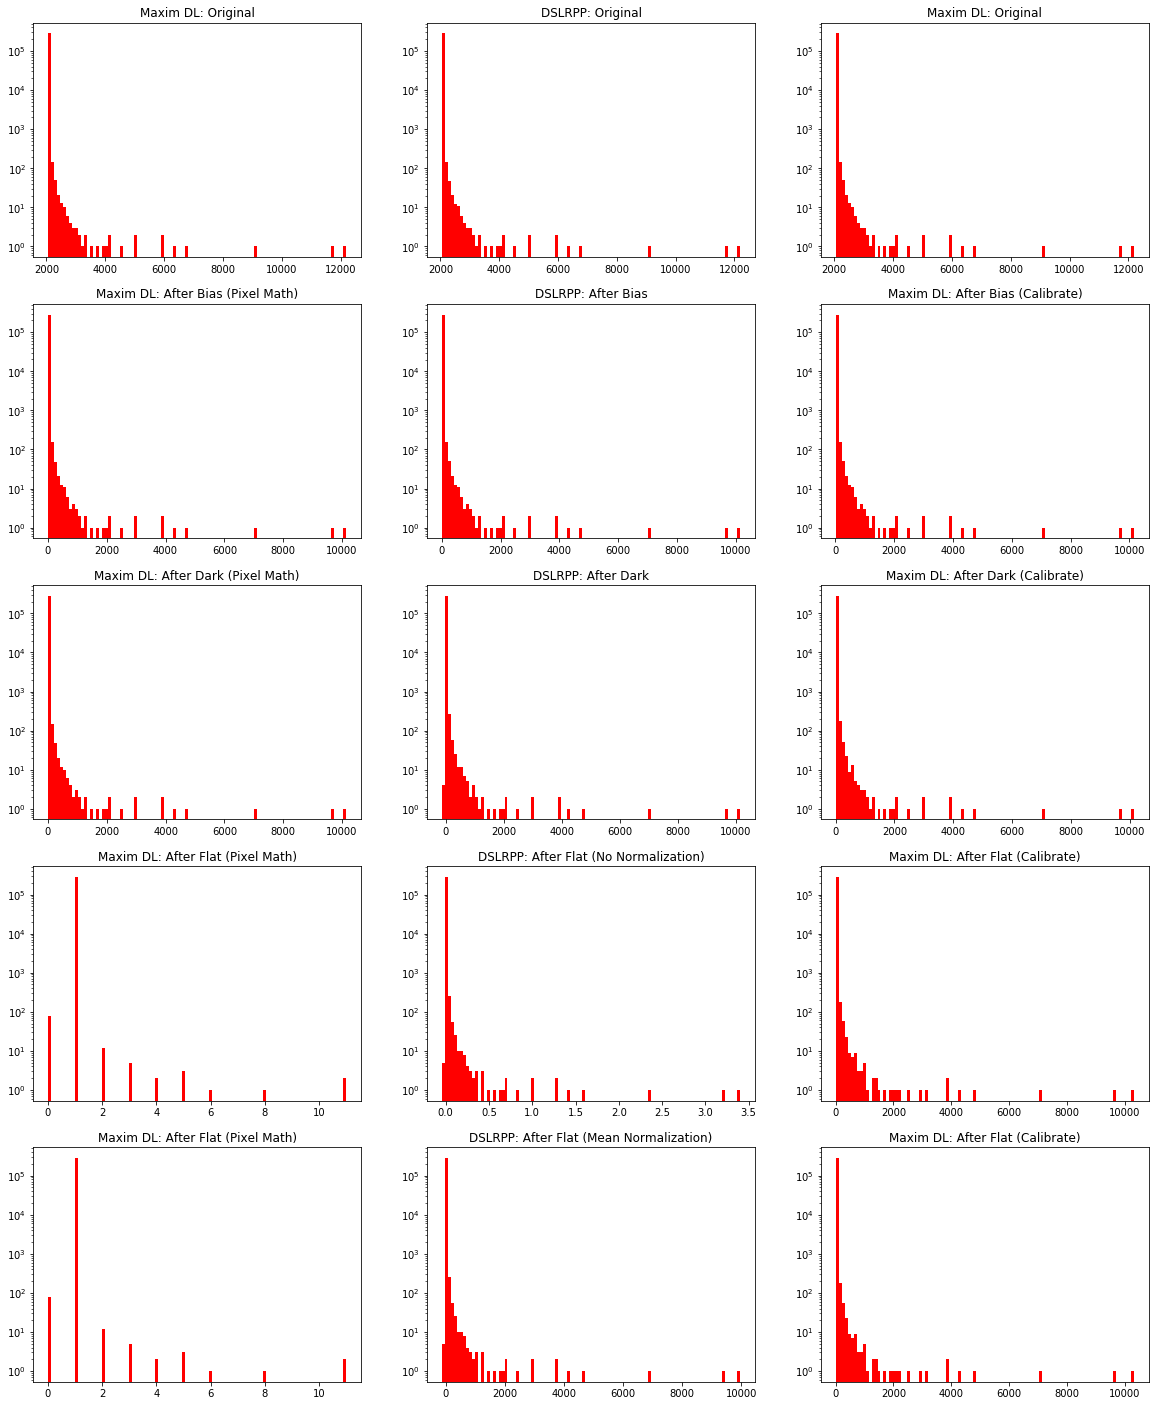

In [7]:
darkR.imdata -= biasR.imdata
#flat.imdata /= flat.imdata.mean()

comparison = plt.figure(figsize=(20,25))

# postupno redukujemo

# ORIGINAL

comparison.add_subplot(5,3,1)
plt.title('Maxim DL: Original')
plt.hist(mx0.ravel(), bins=100, color='red')
plt.yscale('log')

comparison.add_subplot(5,3,2)
plt.title('DSLRPP: Original')
plt.hist(lightR.imdata.ravel(), bins=100, color='red')
plt.yscale('log')

comparison.add_subplot(5,3,3)
plt.title('Maxim DL: Original')
plt.hist(mx0.ravel(), bins=100, color='red')
plt.yscale('log')

# AFTER BIAS
lightb = lightR.imdata - biasR.imdata

comparison.add_subplot(5,3,4)
plt.title('Maxim DL: After Bias (Pixel Math)')
plt.hist(mxbm.ravel(), bins=100, color='red')
plt.yscale('log')

comparison.add_subplot(5,3,5)
plt.title('DSLRPP: After Bias')
plt.hist(lightb.ravel(), bins=100, color='red')
plt.yscale('log')

comparison.add_subplot(5,3,6)
plt.title('Maxim DL: After Bias (Calibrate)')
plt.hist(mxbc.ravel(), bins=100, color='red')
plt.yscale('log')

# AFTER DARK
lightd = lightb - darkR.imdata

comparison.add_subplot(5,3,7)
plt.title('Maxim DL: After Dark (Pixel Math)')
plt.hist(mxdm.ravel(), bins=100, color='red')
plt.yscale('log')

comparison.add_subplot(5,3,8)
plt.title('DSLRPP: After Dark')
plt.hist(lightd.ravel(), bins=100, color='red')
plt.yscale('log')

comparison.add_subplot(5,3,9)
plt.title('Maxim DL: After Dark (Calibrate)')
plt.hist(mxdc.ravel(), bins=100, color='red')
plt.yscale('log')

# AFTER FLAT
lightf = lightd/flatR.imdata

comparison.add_subplot(5,3,10)
plt.title('Maxim DL: After Flat (Pixel Math)')
plt.hist(mxfm.ravel(), bins=100, color='red')
plt.yscale('log')

comparison.add_subplot(5,3,11)
plt.title('DSLRPP: After Flat (No Normalization)')
plt.hist(lightf.ravel(), bins=100, color='red')
plt.yscale('log')

comparison.add_subplot(5,3,12)
plt.title('Maxim DL: After Flat (Calibrate)')
plt.hist(mxfc.ravel(), bins=100, color='red')
plt.yscale('log')

# AFTER FLAT
# +korekcija
lightF = lightf * flatR.imdata.mean()

comparison.add_subplot(5,3,13)
plt.title('Maxim DL: After Flat (Pixel Math)')
plt.hist(mxfm.ravel(), bins=100, color='red')
plt.yscale('log')

comparison.add_subplot(5,3,14)
plt.title('DSLRPP: After Flat (Mean Normalization)')
plt.hist(lightF.ravel(), bins=100, color='red')
plt.yscale('log')

comparison.add_subplot(5,3,15)
plt.title('Maxim DL: After Flat (Calibrate)')
plt.hist(mxfc.ravel(), bins=100, color='red')
plt.yscale('log')

plt.show()

In [8]:
print("O: {}%".format(100*np.count_nonzero(lightR.imdata<0)/np.size(lightR.imdata)))
print("B: {}%".format(100*np.count_nonzero(lightb<0)/np.size(lightb)))
print("D: {}%".format(100*np.count_nonzero(lightd<0)/np.size(lightd)))
print("F: {}%".format(100*np.count_nonzero(lightf<0)/np.size(lightf)))
print("Fn: {}%".format(100*np.count_nonzero(lightF<0)/np.size(lightF)))

O: 0.0%
B: 0.0014190284621633797%
D: 0.013126013275011264%
F: 0.013126013275011264%
Fn: 0.013126013275011264%


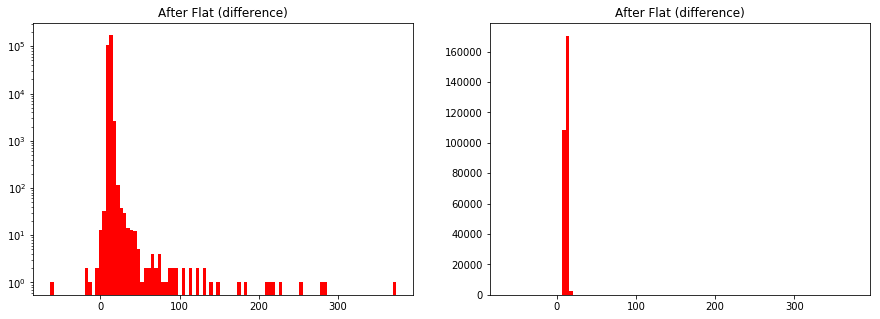

In [9]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('After Flat (difference)')
ax1.hist((mxfc-lightF[:,:-1]).ravel(), bins=100, color='red')
ax1.set_yscale('log')

ax2.set_title('After Flat (difference)')
ax2.hist((mxfc-lightF[:,:-1]).ravel(), bins=100, color='red')
ax2.set_yscale('linear')

plt.show()

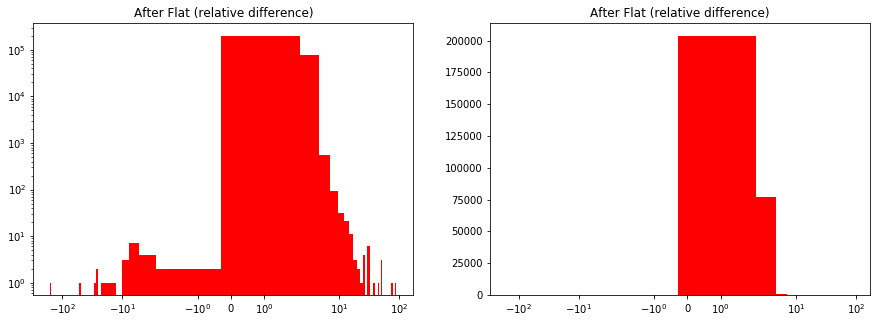

In [10]:
mxfcm = np.ma.masked_array(mxfc)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('After Flat (relative difference)')
ax1.hist((mxfcm/lightF[:,:-1]).ravel(), bins=100, color='red')
ax1.set_yscale('log')
ax1.set_xscale('symlog')

ax2.set_title('After Flat (relative difference)')
ax2.hist((mxfcm/lightF[:,:-1]).ravel(), bins=100, color='red')
ax2.set_yscale('linear')
ax2.set_xscale('symlog')

plt.show()